# Initialization of Parameters of Neural Network
Training your neural network requires specifying an initial value of the weights. A well chosen initialization method will help learning.  
A well chosen initialization can:
- Speed up the convergence of gradient descent
- Increase the odds of gradient descent converging to a lower training (and generalization) error 


Consider an L layer neural network, which has L-1 hidden layers and 1 output layer. The parameters (weights and biases) of the layer l are represented as:

- $W^{[l]}$ : Weight matrix of dimension (size of layer $l$ , size of layer $l-1$)

- $b^{[l]}$ : Bias vector of dimension (size of layer $l$ , 1)

In addition to weights and biases, during the training process, following intermediate variables are computed:

- $Z^{[l]}$ : Linear Activation of layer 1

- $g^{[l]}(.)$ : Non-linear function

- $A^{[l]}$ : Non-linear activation. Output of $g^{[l]}(Z^{[l]})$ , where $A^{[0]}$ is the input data X.

$$
Z^{[l]} = W^{[l]} \cdot A^{[l-1]} + b^{[l]}
$$
$$
A^{[l]} = g^{[l]}(Z^{[l]})
$$


Training a neural network consists of 4 steps:

1. Initialize weights and biases.

2. Forward propagation: Using the input X, weights W and biases b, for every layer we compute Z and A. At the final layer, we compute f(A^(L-1)) which could be a sigmoid, softmax or linear function of A^(L-1) and this gives the prediction y_hat.

3. Compute the loss function: This is a function of the actual label y and predicted label y_hat. It captures how far off our predictions are from the actual target. Our objective is to minimize this loss function.

4. Backward Propagation: In this step, we calculate the gradients of the loss function f(y, y_hat) with respect to A, W, and b called dA, dW and db. Using these gradients we update the values of the parameters from the last layer to the first.

5. Repeat steps 2–4 for n iterations/epochs till we feel we have minimized the loss function, without overfitting the train data (more on this later!)

You will use a 3-layer neural network and here are the initialization methods we will experiment with:

- Zeros initialization -- setting initialization = "zeros" in the input argument.

- Random initialization -- setting initialization = "random" in the input argument. This initializes the weights to large random values.

- He initialization -- setting initialization = "he" in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015.

Here is the structure of the neural network=> LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets


## Load dataset
We will create a sample circle dataset using scikit learn.

(2, 300)

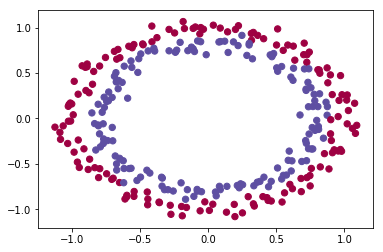

In [18]:
def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

train_X, train_Y, test_X, test_Y = load_dataset()
train_X.shape

## Define the 3-layer Neural Network
Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.

In [48]:
#Class definition of Neural Network
class Network:
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
    def __init__(self,X,Y,learning_rate=0.01,num_iterations = 15000, print_cost = True, initialization = "he"):
        self.n_samples = Y.shape[1]
        self.X=X
        self.Y=Y
        self.lr=learning_rate
        self.iter=num_iterations
        self.print_cost=print_cost
        self.initialization=initialization
        self.costs = [] # to keep track of the loss
        self.layers_dims = [X.shape[0], 10, 5, 1]
        self.parameters={}
   
    def sigmoid(self,x):
        """
        Compute the sigmoid of x
        Arguments:
        x -- A scalar or numpy array of any size.
        Return:
        s -- sigmoid(x)
        """
        s = 1/(1+np.exp(-x))
        return s

    def relu(self,x):
        """
        Compute the relu of x
        Arguments:
        x -- A scalar or numpy array of any size.
        Return:
        s -- relu(x)
        """
        s = np.maximum(0,x)
        return s
    
    def forward_propagation(self, X, parameters):
        """
        Implements the forward propagation (and computes the loss).
        Arguments:
        X -- input dataset, of shape (input size, number of examples)
        Y -- true "label" vector (0 for red-dots and 1 for blue-dots)
        parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
        Returns:
        loss -- the loss function (vanilla logistic loss)
        """   
        # retrieve parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        W3 = parameters["W3"]
        b3 = parameters["b3"]
    
        # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
        z1 = np.dot(W1, X) + b1
        a1 = self.relu(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = self.relu(z2)
        z3 = np.dot(W3, a2) + b3
        a3 = self.sigmoid(z3)
    
        cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
        return a3, cache
    
    #Compute cost
    def compute_loss(self, a3):
        """
        Implement the loss function
        Arguments:
        a3 -- post-activation, output of forward propagation
        Y -- "true" labels vector, same shape as a3
        Returns:
        loss - value of the loss function
        """
        m = self.n_samples
        logprobs = np.multiply(-np.log(a3),self.Y) + np.multiply(-np.log(1 - a3), 1 - self.Y)
        loss = 1./m * np.nansum(logprobs)
        return loss
    
    def backward_propagation(self, cache):
        """
        Implement the backward propagation.
        Arguments:
        X -- input dataset, of shape (input size, number of examples)
        Y -- true "label" vector (0 for red-dots and 1 for blue-dots)
        cache -- cache output from forward_propagation()
        Returns:
        gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
        """
        m = self.n_samples
        (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
        dz3 = 1./m * (a3 - self.Y)
        dW3 = np.dot(dz3, a2.T)
        db3 = np.sum(dz3, axis=1, keepdims = True)
    
        da2 = np.dot(W3.T, dz3)
        dz2 = np.multiply(da2, np.int64(a2 > 0))
        dW2 = np.dot(dz2, a1.T)
        db2 = np.sum(dz2, axis=1, keepdims = True)
    
        da1 = np.dot(W2.T, dz2)
        dz1 = np.multiply(da1, np.int64(a1 > 0))
        dW1 = np.dot(dz1, self.X.T)
        db1 = np.sum(dz1, axis=1, keepdims = True)
    
        gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
        return gradients
    
    #Update the coefficients
    def update_parameters(self, parameters, grads):
        """
        Update parameters using gradient descent
        Arguments:
        parameters -- python dictionary containing your parameters 
        grads -- python dictionary containing your gradients, output of n_model_backward
        Returns:
        parameters -- python dictionary containing your updated parameters 
                  parameters['W' + str(i)] = ... 
                  parameters['b' + str(i)] = ...
        """
        L = len(parameters) // 2 # number of layers in the neural networks
        # Update rule for each parameter
        for k in range(L):
            parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - self.lr * grads["dW" + str(k+1)]
            parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - self.lr * grads["db" + str(k+1)]
        return parameters
        
    def initialize_parameters_zeros(self):
        """
        Arguments:
        layer_dims -- python array (list) containing the size of each layer.
        Returns:
        parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
        """
    
        parameters = {}
        L = len(self.layers_dims)            # number of layers in the network
    
        for l in range(1, L):
            parameters['W' + str(l)] = np.zeros((self.layers_dims[l], self.layers_dims[l-1]))
            parameters['b' + str(l)] = np.zeros((self.layers_dims[l], 1))
        return parameters
        
    def initialize_parameters_random(self):
        """
        Arguments:
        layer_dims -- python array (list) containing the size of each layer.
    
        Returns:
        parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
        """
    
        np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
        parameters = {}
        L = len(self.layers_dims)            # integer representing the number of layers
    
        for l in range(1, L):
            parameters['W' + str(l)] = np.random.randn(self.layers_dims[l], self.layers_dims[l-1]) * 10
            parameters['b' + str(l)] = np.zeros((self.layers_dims[l], 1))

        return parameters
    
    def initialize_parameters_he(self):
        """
        Arguments:
        layer_dims -- python array (list) containing the size of each layer.
    
        Returns:
        parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
        """
    
        np.random.seed(3)
        parameters = {}
        L = len(self.layers_dims) - 1 # integer representing the number of layers
     
        for l in range(1, L + 1):
            parameters['W' + str(l)] = np.random.randn(self.layers_dims[l], self.layers_dims[l-1]) * np.sqrt(2/self.layers_dims[l-1])
            parameters['b' + str(l)] = np.zeros((self.layers_dims[l], 1))
        
        return parameters
    
    def fit(self):
        grads = {}
 
        # Initialize parameters dictionary.
        if self.initialization == "zeros":
            parameters = self.initialize_parameters_zeros()
        elif self.initialization == "random":
            parameters = self.initialize_parameters_random()
        elif self.initialization == "he":
            parameters = self.initialize_parameters_he()
        
        # Loop (gradient descent)

        for i in range(0, self.iter):

            # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
            a3, cache = self.forward_propagation(self.X,parameters)
        
            # Loss
            cost = self.compute_loss(a3)

            # Backward propagation.
            grads = self.backward_propagation( cache)
        
            # Update parameters.
            parameters = self.update_parameters(parameters, grads)
            self.parameters=parameters
            # Print the loss every 1000 iterations
            if self.print_cost and i % 1000 == 0:
                print("Cost after iteration {}: {}".format(i, cost))
                self.costs.append(cost)
            

     
    def predict(self,X, y, parameters):
        """
        This function is used to predict the results of a  n-layer neural network.
        Arguments:
        X -- data set of examples you would like to label
        parameters -- parameters of the trained model
        Returns:
        p -- predictions for the given dataset X
        """
        m = X.shape[1]
        p = np.zeros((1,m), dtype = np.int)
    
        # Forward propagation
        a3, caches = self.forward_propagation(X, parameters)
    
        # convert probas to 0/1 predictions
        for i in range(0, a3.shape[1]):
            if a3[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0

        # print results
        print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
        return p
    
    
    def getCosts(self):
        return self.costs
    
    def getParameters(self):
        return self.parameters

## Initializing weights W

One of the starting points to take care of while building your network is to initialize your weight matrix correctly. Let us consider 2 scenarios that can cause issues while training the model:

## 1 - Zero initialization

Let’s just put it out there — this makes your model equivalent to a linear model. When you set all weight to 0, the derivative with respect to loss function is the same for every w in W^l, thus, all the weights have the same values in the subsequent iteration. This makes the hidden units symmetric and continues for all the n iterations you run. Thus setting weights to zero makes your network no better than a linear model. It is important to note that setting biases to 0 will not create any troubles as non zero weights take care of breaking the symmetry and even if bias is 0, the values in every neuron are still different.

There are two types of parameters to initialize in a neural network:
- the weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- the bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

In this section, we will initialize all parameters to zeros. You'll see later that this does not work well since it fails to "break symmetry", but lets try it anyway and see what happens. Use np.zeros((..,..)) with the correct shapes.

Run the following code to train your model on 15,000 iterations using zeros initialization.

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453
On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


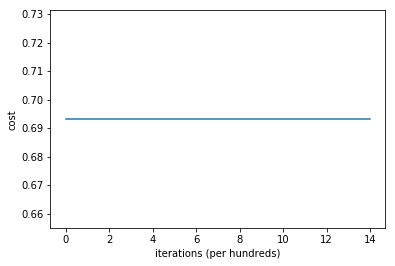

In [49]:
model = Network(train_X, train_Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "zeros")
model.fit()
parameters= model.getParameters()
costs=model.getCosts()
print ("On the train set:")
predictions_train = model.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = model.predict(test_X, test_Y, parameters)

# plot the loss
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
#plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [55]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


The model is predicting 0 for every example. 

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, and you might as well be training a neural network with $n^{[l]}=1$ for every layer, and the network is no more powerful than a linear classifier such as logistic regression. 

<font color='blue'>
**What you should remember**:
    
- The weights $W^{[l]}$ should be initialized randomly to break symmetry. 
- It is however okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly. 


## 2 - Random initialization

Initializing weights randomly, following standard normal distribution (np.random.randn(size_l, size_l-1) in Python) while working with a (deep) network can potentially lead to 2 issues — vanishing gradients or exploding gradients.

**a) Vanishing gradients** — In case of deep networks, for any activation function, abs(dW) will get smaller and smaller as we go backwards with every layer during back propagation. The earlier layers are the slowest to train in such a case.The weight update is minor and results in slower convergence. This makes the optimization of the loss function slow. In the worst case, this may completely stop the neural network from training further.

**b) Exploding gradients** — This is the exact opposite of vanishing gradients. Consider you have non-negative and large weights and small activations A (as can be the case for sigmoid(z)). When these weights are multiplied along the layers, they cause a large change in the cost. Thus, the gradients are also going to be large. This means that the changes in W, by W — ⍺ * dW, will be in huge steps, the downward moment will increase.This may result in oscillating around the minima or even overshooting the optimum again and again and the model will never learn!

To break symmetry, lets intialize the weights randomly. Following random initialization, each neuron can then proceed to learn a different function of its inputs. In this exercise, you will see what happens if the weights are intialized randomly, but to very large values. 

**Exercise**: Implement the following function to initialize your weights to large random values (scaled by \*10) and your biases to zeros. Use `np.random.randn(..,..) * 10` for weights and `np.zeros((.., ..))` for biases. We are using a fixed `np.random.seed(..)` to make sure your "random" weights  match ours, so don't worry if running several times your code gives you always the same initial values for the parameters. 

Run the following code to train your model on 15,000 iterations using random initialization.

/Users/adas1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in log
/Users/adas1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 0: inf
Cost after iteration 1000: 0.6250676215287511
Cost after iteration 2000: 0.5981418252875961
Cost after iteration 3000: 0.563858109377261
Cost after iteration 4000: 0.5501823050061752
Cost after iteration 5000: 0.5444756668990652
Cost after iteration 6000: 0.5374638179631746
Cost after iteration 7000: 0.4770885368883873
Cost after iteration 8000: 0.397834663330821
Cost after iteration 9000: 0.3934832163377203
Cost after iteration 10000: 0.39203323866307854
Cost after iteration 11000: 0.3892818629893498
Cost after iteration 12000: 0.3861521882410713
Cost after iteration 13000: 0.38499297516135134
Cost after iteration 14000: 0.38280470097181446
On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


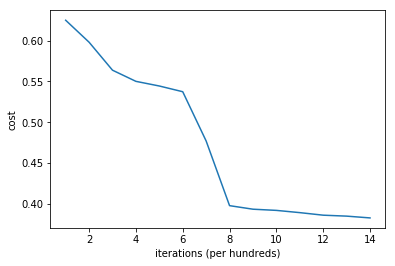

In [57]:
model = Network(train_X, train_Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "random")
model.fit()
parameters= model.getParameters()
costs=model.getCosts()
print ("On the train set:")
predictions_train = model.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = model.predict(test_X, test_Y, parameters)
# plot the loss
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
#plt.title("Learning rate =" + str(learning_rate))
plt.show()

If you see "inf" as the cost after the iteration 0, this is because of numerical roundoff; a more numerically sophisticated implementation would fix this. But this isn't worth worrying about for our purposes. 

Anyway, it looks like you have broken symmetry, and this gives better results. than before. The model is no longer outputting all 0s. 

In [58]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


**Observations**:
- The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that are very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. Indeed, when $\log(a^{[3]}) = \log(0)$, the loss goes to infinity.
- Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm. 
- If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization.


**In summary**:
- Initializing weights to very large random values does not work well. 
- Hopefully intializing with small random values does better. The important question is: how small should be these random values be? Lets find out in the next part! 

## Best Practices

1. Using RELU/ leaky RELU as the activation function, as it is relatively robust to the vanishing/exploding gradient issue (especially for networks that are not too deep). In the case of leaky RELU’s, they never have 0 gradient. Thus they never die and training continues.

- a) For RELU(z) — He initialization is recommended. We multiply the randomly generated values of W by $\sqrt{\frac{2}{size^{[l-1]}}}$.

- b) For tanh(z) — The heuristic is called Xavier initialization. It is similar to the previous one, except that k is 1 instead of 2.$\sqrt{\frac{1}{size^{[l-1]}}}$.

## 3 - He initialization

Finally, try "He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)

This function is similar to the previous `initialize_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 10, you will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is what He initialization recommends for layers with a ReLU activation. 

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071794
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.15015556280371817
Cost after iteration 11000: 0.12325079292273551
Cost after iteration 12000: 0.09917746546525935
Cost after iteration 13000: 0.08457055954024278
Cost after iteration 14000: 0.07357895962677366
On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


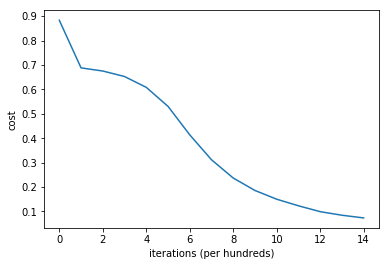

In [59]:
model = Network(train_X, train_Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he")
model.fit()
parameters= model.getParameters()
costs=model.getCosts()
print ("On the train set:")
predictions_train = model.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = model.predict(test_X, test_Y, parameters)
# plot the loss
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
#plt.title("Learning rate =" + str(learning_rate))
plt.show()

## Conclusions

You have seen three different types of initializations. For the same number of iterations and same hyperparameters the comparison is:
<img src="images/nn_initialize1.png" width="60%" height="60%">

- Different initializations lead to different results
- Random initialization is used to break symmetry and make sure different hidden units can learn different things
- Don't intialize to values that are too large
- He initialization works well for networks with ReLU activations. 